<a href="https://colab.research.google.com/github/ind-kum/M.L.-EVELUTION-PROJECTS/blob/master/pending_Cardiac_Disease_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("https://raw.githubusercontent.com/ind-kum/Datasets/master/cardio_train.csv", sep=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
#Lets check the null values 
print(df.isnull().sum())

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [ ]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [ ]:
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003587,0.003773,-0.003735,-0.001549,0.003268,-0.002757,0.006400,0.002543,-0.003294,0.000384,0.002700,0.004269
age,0.003587,1.000000,-0.023150,-0.081304,0.054409,0.020663,0.017717,0.154343,0.099095,-0.047680,-0.029435,-0.009926,0.238095
gender,0.003773,-0.023150,1.000000,0.499373,0.155649,0.005980,0.015396,-0.036335,-0.021154,0.337608,0.171015,0.006241,0.008592
height,-0.003735,-0.081304,0.499373,1.000000,0.290333,0.005492,0.006215,-0.050632,-0.018929,0.187899,0.094164,-0.005974,-0.011015
weight,-0.001549,0.054409,0.155649,0.290333,1.000000,0.030665,0.043652,0.141901,0.107255,0.068304,0.067259,-0.016514,0.182094
ap_hi,0.003268,0.020663,0.005980,0.005492,0.030665,1.000000,0.015919,0.023573,0.011821,-0.000933,0.001385,0.000032,0.054211
ap_lo,-0.002757,0.017717,0.015396,0.006215,0.043652,0.015919,1.000000,0.024023,0.010895,0.004948,0.010764,0.004962,0.065290
cholesterol,0.006400,0.154343,-0.036335,-0.050632,0.141901,0.023573,0.024023,1.000000,0.451741,0.010237,0.036015,0.009708,0.220752
gluc,0.002543,0.099095,-0.021154,-0.018929,0.107255,0.011821,0.010895,0.451741,1.000000,-0.004608,0.011442,-0.007301,0.089062
smoke,-0.003294,-0.047680,0.337608,0.187899,0.068304,-0.000933,0.004948,0.010237,-0.004608,1.000000,0.339709,0.025794,-0.015225


In [ ]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


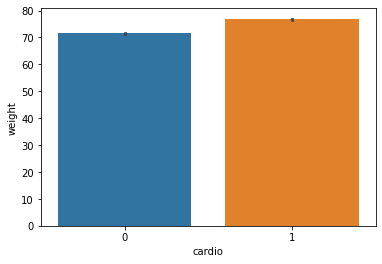

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x="cardio",y="weight",data=df)
plt.show()

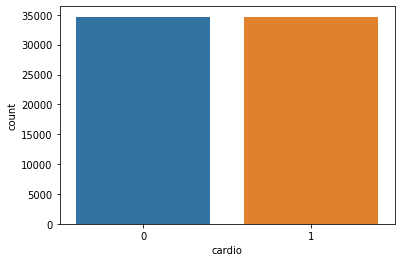

In [ ]:
sns.countplot(x="cardio",data=df)
plt.show()

In [ ]:
import numpy as np
df_x=df.drop(columns=["cardio","id"])
y=df[["cardio"]]

In [ ]:
#Lets bring input dataset features to same scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,1.216018,-0.733023,-1.140999,-0.361739,0.007562,-0.088052,0.930805,1.351794,-0.310728,-0.238641,0.493765
1,-1.953915,-0.733023,-0.166017,-0.222690,-0.121658,-0.140935,-0.539210,-0.395719,-0.310728,-0.238641,0.493765
2,0.985802,-0.733023,0.077728,-0.292214,-0.057048,-0.088052,-0.539210,-0.395719,-0.310728,-0.238641,0.493765
3,-1.994041,1.364213,0.077728,0.750657,-0.057048,-0.088052,-0.539210,-0.395719,3.218244,4.190400,0.493765
4,1.590525,-0.733023,-1.140999,-0.848413,-0.057048,-0.088052,-0.539210,-0.395719,-0.310728,-0.238641,0.493765
...,...,...,...,...,...,...,...,...,...,...,...
69296,-0.092729,1.364213,0.443347,0.124934,-0.057048,-0.088052,-0.539210,-0.395719,3.218244,-0.238641,0.493765
69297,1.269519,-0.733023,-0.775381,3.601172,0.072172,-0.035168,0.930805,1.351794,-0.310728,-0.238641,0.493765
69298,-0.163254,1.364213,2.271438,2.141152,0.330612,-0.035168,2.400819,-0.395719,-0.310728,4.190400,-2.025256
69299,1.200616,-0.733023,-0.166017,-0.153165,0.039867,-0.088052,-0.539210,1.351794,-0.310728,-0.238641,-2.025256


In [ ]:
#We will use f1 score as the metrics as it is balanced dataset problem
#Maximum f1 score in between random states 42 to 100
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
def maxf1_score(clf,x,y):
    maxf=0
    rs=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = r_state,test_size=0.25,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        tmp=f1_score(y_test,y_pred)
        print("random state :",r_state," and f1 score: ",tmp)
        if tmp>maxf:
            maxf=tmp
            rs=r_state
    print("maximum f1_score is at random state :",rs," and it is :",maxf)

# 1. LogisticRegression

In [ ]:
#lets use logistic regression
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
lg_clf=LogisticRegression()
maxf1_score(lg_clf,x,y)

random state : 42  and f1 score:  0.7003792667509482
random state : 43  and f1 score:  0.7069722673404318
random state : 44  and f1 score:  0.7018524142119648
random state : 45  and f1 score:  0.7159383803872206
random state : 46  and f1 score:  0.7072834999102281
random state : 47  and f1 score:  0.7090010844680082
random state : 48  and f1 score:  0.704664459825459
random state : 49  and f1 score:  0.7066780404582014
random state : 50  and f1 score:  0.7101966717095309
random state : 51  and f1 score:  0.703420910238682
random state : 52  and f1 score:  0.7049655672345053
random state : 53  and f1 score:  0.7035438575162604
random state : 54  and f1 score:  0.6994853163790492
random state : 55  and f1 score:  0.7062095652699679
random state : 56  and f1 score:  0.7122397400409195
random state : 57  and f1 score:  0.7064838205220738
random state : 58  and f1 score:  0.7052189562087583
random state : 59  and f1 score:  0.7019562715765247
random state : 60  and f1 score:  0.711068519405

In [ ]:
#Lets use cross_val_score and evaluate the logistic regression model
from sklearn.model_selection import cross_val_score
print("Mean f1 score for logistic classifier: ",cross_val_score(lg_clf,x,y,cv=5,scoring="f1").mean())
print("Standard deviation in f1 score for logistic classifier: ",cross_val_score(lg_clf,x,y,cv=5,scoring="f1").std())
print(cross_val_score(lg_clf,x,y,cv=5,scoring="f1"))

Mean f1 score for logistic classifier:  0.7073847683571441
Standard deviation in f1 score for logistic classifier:  0.006282594720711762
[0.69754397 0.71374736 0.70551181 0.71465413 0.70546658]


## 4. SVM

In [ ]:
#Lets use SVM
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="f1")
clf.fit(x,y)
clf.best_params_

{'C': 10, 'kernel': 'rbf'}

In [ ]:
svc=SVC(kernel="rbf",C=10)
maxf1_score(svc,x,y)

random state : 42  and f1 score:  0.7150444590320463
random state : 43  and f1 score:  0.7233537200878808
random state : 44  and f1 score:  0.7191764424227914
random state : 45  and f1 score:  0.7285849503076195
random state : 46  and f1 score:  0.7218738909262982
random state : 47  and f1 score:  0.7195136488258432
random state : 48  and f1 score:  0.7212257987884547
random state : 49  and f1 score:  0.7183317399617593
random state : 50  and f1 score:  0.724577031147247
random state : 51  and f1 score:  0.718831631441463
random state : 52  and f1 score:  0.7221725924602466
random state : 53  and f1 score:  0.717100928421683
random state : 54  and f1 score:  0.716983387116051
random state : 55  and f1 score:  0.7232472324723246
random state : 56  and f1 score:  0.723853591979593
random state : 57  and f1 score:  0.7212218458429904
random state : 58  and f1 score:  0.7198909435751542
random state : 59  and f1 score:  0.7156083865957829
random state : 60  and f1 score:  0.729336644200071

In [16]:
#lets again use cross val score
print("Mean f1 score for SVM classifier: ",cross_val_score(svc,x,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for SVM classifier: ",cross_val_score(svc,x,y,cv=5,scoring="f1").std())
print(cross_val_score(svc,x,y,cv=5,scoring="f1"))

Mean f1 score for SVM classifier:  0.72330531868043
standard deviation in f1 score for SVM classifier:  0.0034249438762179933
[0.71885173 0.72941527 0.72313865 0.72214344 0.72297749]


## 6. AdaBoostClassifier

In [ ]:
#Lets use ada boosting using svm as an estimator
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada=AdaBoostClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],"base_estimator":[lg_clf,svc,DecisionTreeClassifier()]}
clf = GridSearchCV(ada, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

In [ ]:
ada=AdaBoostClassifier(base_estimator=lg_clf,algorithm='SAMME')
maxf1_score(ada,x,y)

In [ ]:
print("Mean auc roc score for AdaBoostClassifier: ",cross_val_score(ada,x,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for AdaBoostClassifier: ",cross_val_score(ada,x,y,cv=5,scoring="f1").std())
print(cross_val_score(ada,x,y,cv=5,scoring="f1"))

## 7. GradientBoostingClassifier

In [ ]:
#Lets use Gradient boosting classifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
gb_clf=GradientBoostingClassifier()
clf = GridSearchCV(gb_clf, parameters, cv=5,scoring="f1")
clf.fit(x,y)
clf.best_params_

In [ ]:
gb_clf=GradientBoostingClassifier(learning_rate=0.1,n_estimators=500)
maxf1_score(gb_clf,x,y)

In [ ]:
#Lets use cross_val_score and evaluate the model
from sklearn.model_selection import cross_val_score
print("Mean f1 score for GradientBoostingClassifier: ",cross_val_score(gb_clf,x,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for GradientBoostingClassifier: ",cross_val_score(gb_clf,x,y,cv=5,scoring="f1").std())
print(cross_val_score(gb_clf,x,y,cv=5,scoring="f1"))

# 8. XGBClassifier

In [ ]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
maxf1_score(xgb_clf,x,y)

In [ ]:
#Lets use cross_val_score and evaluate the model
from sklearn.model_selection import cross_val_score
print("Mean f1 score for XGBClassifier: ",cross_val_score(xgb_clf,x,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for XGBClassifier: ",cross_val_score(xgb_clf,x,y,cv=5,scoring="f1").std())
print(cross_val_score(xgb_clf,x,y,cv=5,scoring="f1"))

In [ ]:
#lets use ensemble calssifier such as random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,100,500,1000]}
rfc=RandomForestClassifier()
clf = GridSearchCV(rfc, parameters, cv=5,scoring="f1")
clf.fit(x,y)
clf.best_params_

In [ ]:
rfc=RandomForestClassifier(n_estimators=1000)
maxf1_score(rfc,x,y)

In [ ]:
#lets again use cross val score
print("Mean f1 score for random forest classifier: ",cross_val_score(rfc,x,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for random forest classifier: ",cross_val_score(rfc,x,y,cv=5,scoring="f1").std())
print(cross_val_score(rfc,x,y,cv=5,scoring="f1"))